<h1>IMPORTING LIBRARIES</h1>

In [1]:
# Data manipulation and plotting modules
import numpy as np
import pandas as pd

# Data pre-processing
from sklearn.preprocessing import StandardScaler as ss

# Dimensionality reduction and noise removal
from sklearn.decomposition import PCA

# Data splitting and model parameter search
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# Model pipelining
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# Hyperparameter optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Modeling modules
from xgboost.sklearn import XGBClassifier

# Model evaluation metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix

# Plotting Modules
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance

# Permutation feature importance
from sklearn.inspection import permutation_importance

# Misc
import time
import os
import gc
import random

# Used in Randomized parameter search
from scipy.stats import uniform

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Set option to dislay many rows
pd.set_option('display.max_columns', 100)

<h1>DATA READING AND EXPLORATION</h1>

In [2]:
# Reading the file
data = pd.read_csv("weatherAUS.csv")

In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
print("\n Shape")
data.shape    


 Shape


(145460, 23)

In [5]:
print("\n\n Columns")
data.columns.values       # Label column is the last one
print("\n")



 Columns


array(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'RainTomorrow'], dtype=object)

In [6]:
print("\n\nTarget distribution")
data.RainTomorrow.value_counts()



Target distribution


No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [7]:
print("\n\nData types")                        
data.dtypes.value_counts()



Data types


float64    16
object      7
dtype: int64

In [8]:
print("\n")
data.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No


In [9]:
# 3.1 Examine data statistics
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


<h1>DATA VISUALIZATION</h1>

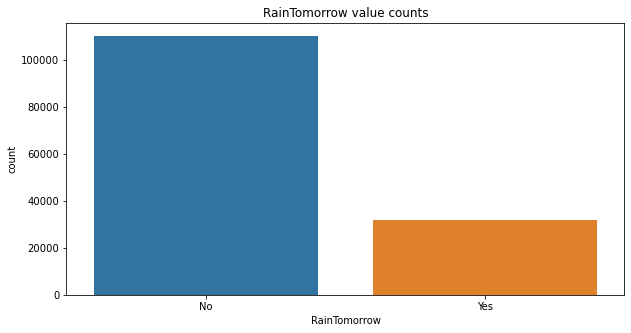

In [10]:
plt.figure(figsize=(10,5))
plt.title('RainTomorrow value counts')
sns.countplot(x=data["RainTomorrow"]);

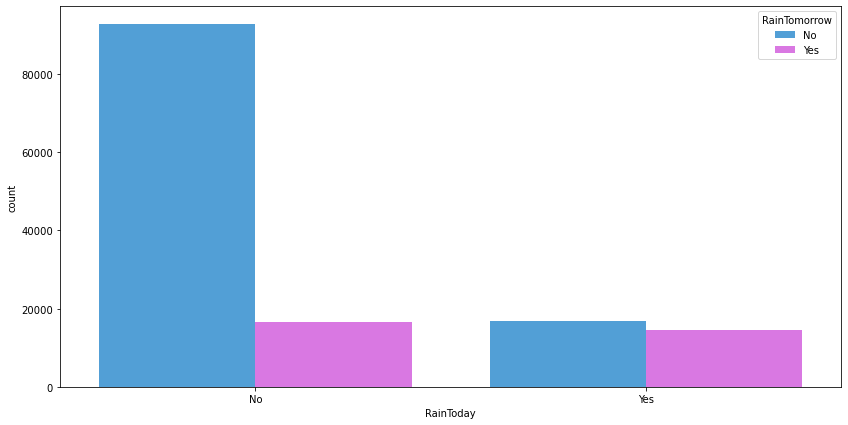

In [11]:
plt.figure(figsize=(14,7))
sns.countplot(x=data["RainToday"], hue=data["RainTomorrow"], palette=sns.color_palette("husl")[4:]);

<Figure size 1224x936 with 0 Axes>

<AxesSubplot:xlabel='count', ylabel='Location'>

Text(0.5, 1.0, 'Location distribution')

Text(0.5, 0, '')

Text(0, 0.5, '')

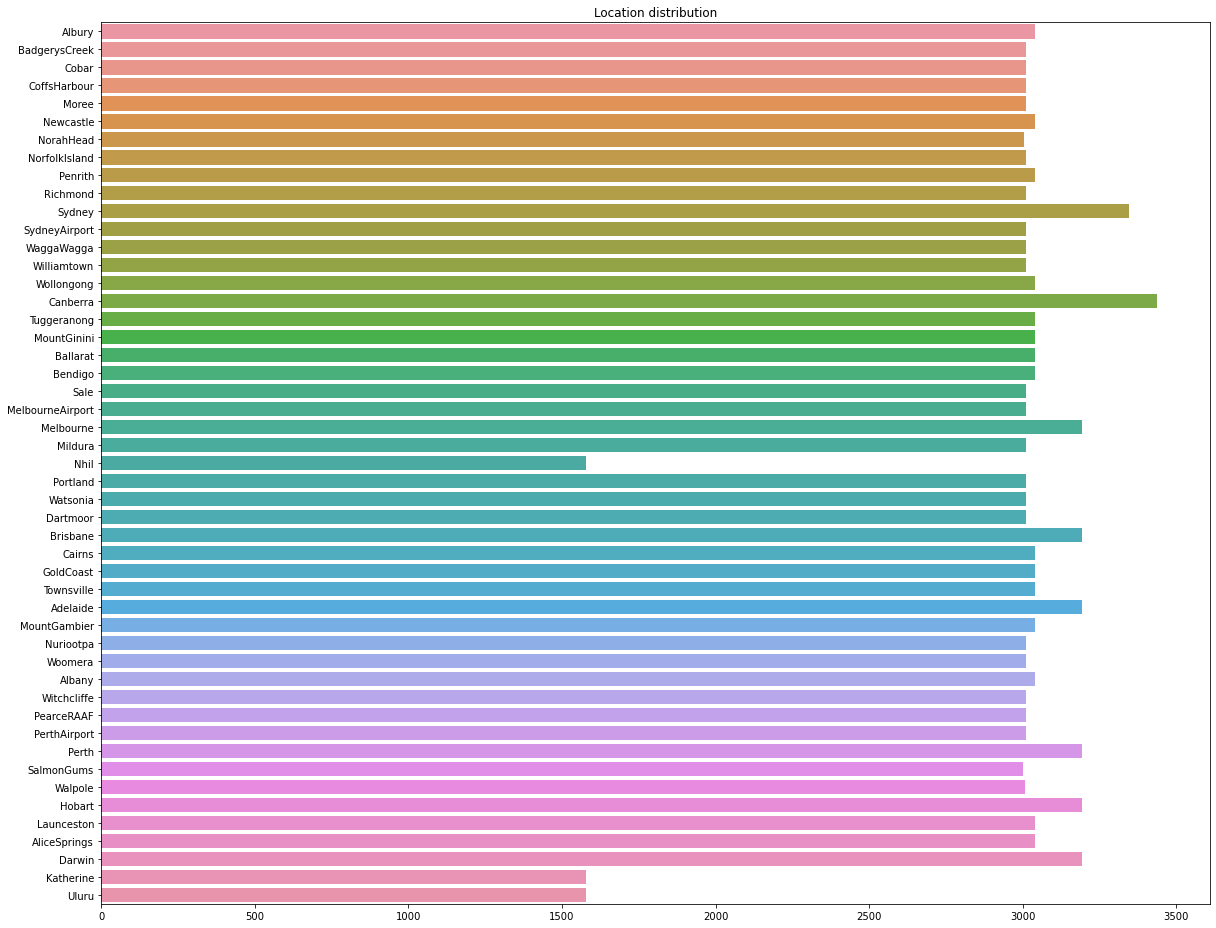

In [12]:
plt.figure(figsize=(17,13))
sns.countplot(data=data, y='Location')

plt.title('Location distribution')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

<Figure size 1224x936 with 0 Axes>

<AxesSubplot:xlabel='count', ylabel='Location'>

Text(0.5, 1.0, 'Today Rain count by LOC')

Text(0.5, 0, '')

Text(0, 0.5, '')

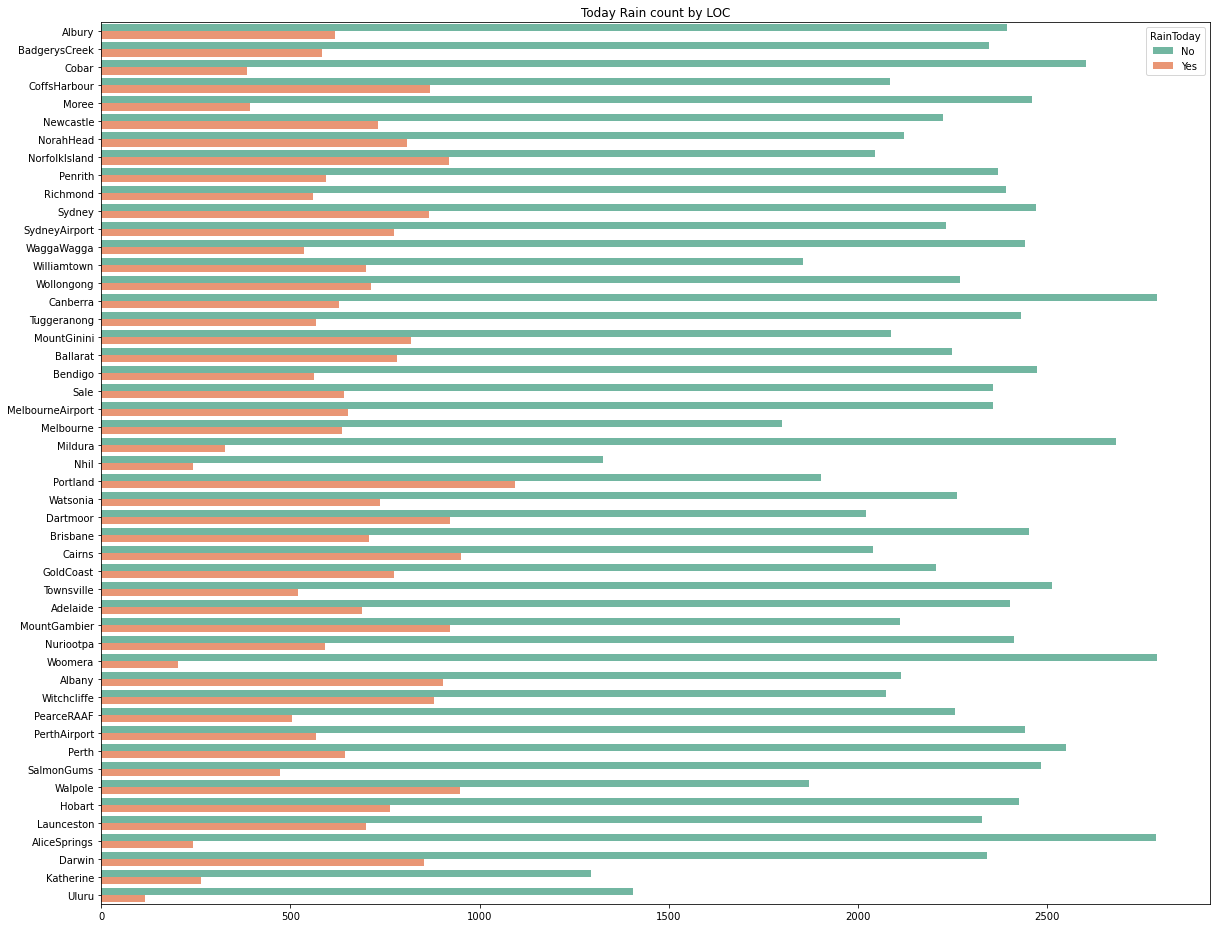

In [13]:
plt.figure(figsize=(17,13))
sns.countplot(data=data, y='Location', hue="RainToday", palette=sns.color_palette("Set2"))

plt.title('Today Rain count by LOC')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

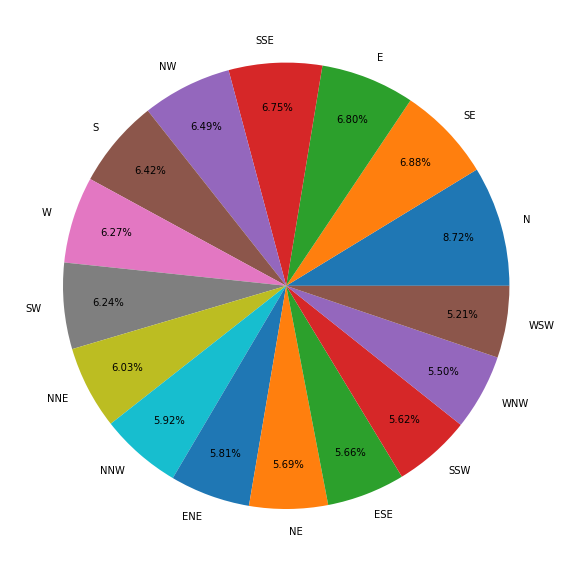

In [14]:
plt.figure(figsize=(10,11))
plt.pie(data["WindDir9am"].value_counts(),
        labels=list(data["WindDir9am"].value_counts().index),
        autopct='%1.2f%%',
        pctdistance=0.8,
       );

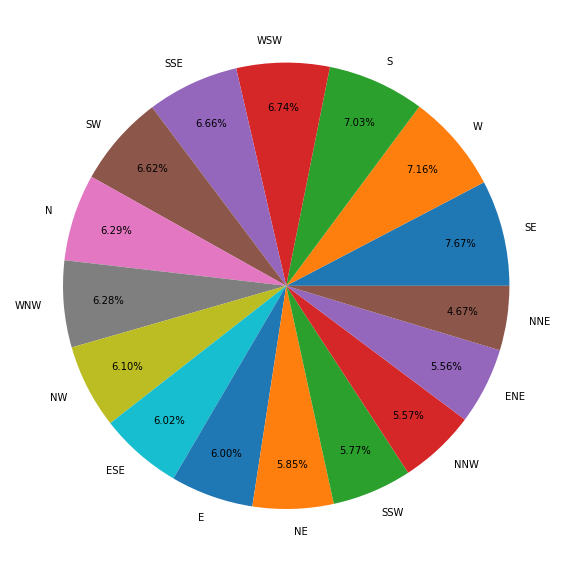

In [15]:
plt.figure(figsize=(10,11))
plt.pie(data["WindDir3pm"].value_counts(),
        labels=list(data["WindDir3pm"].value_counts().index),
        autopct='%1.2f%%',
        pctdistance=0.8,
       );

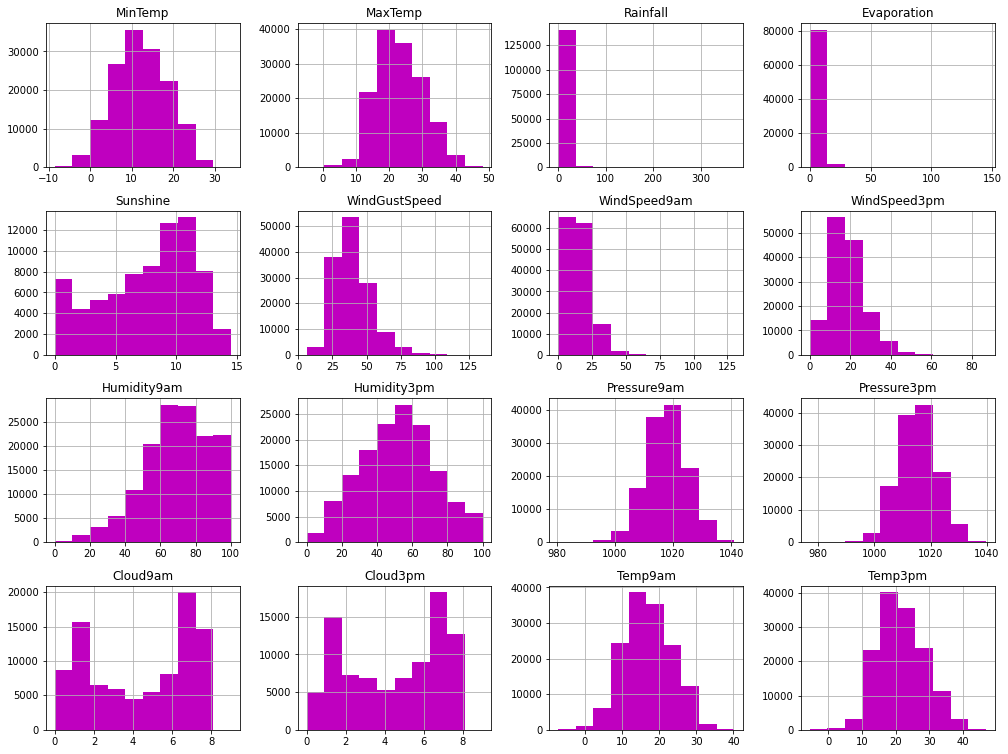

In [16]:
data.hist(figsize=(17,13), color="m");

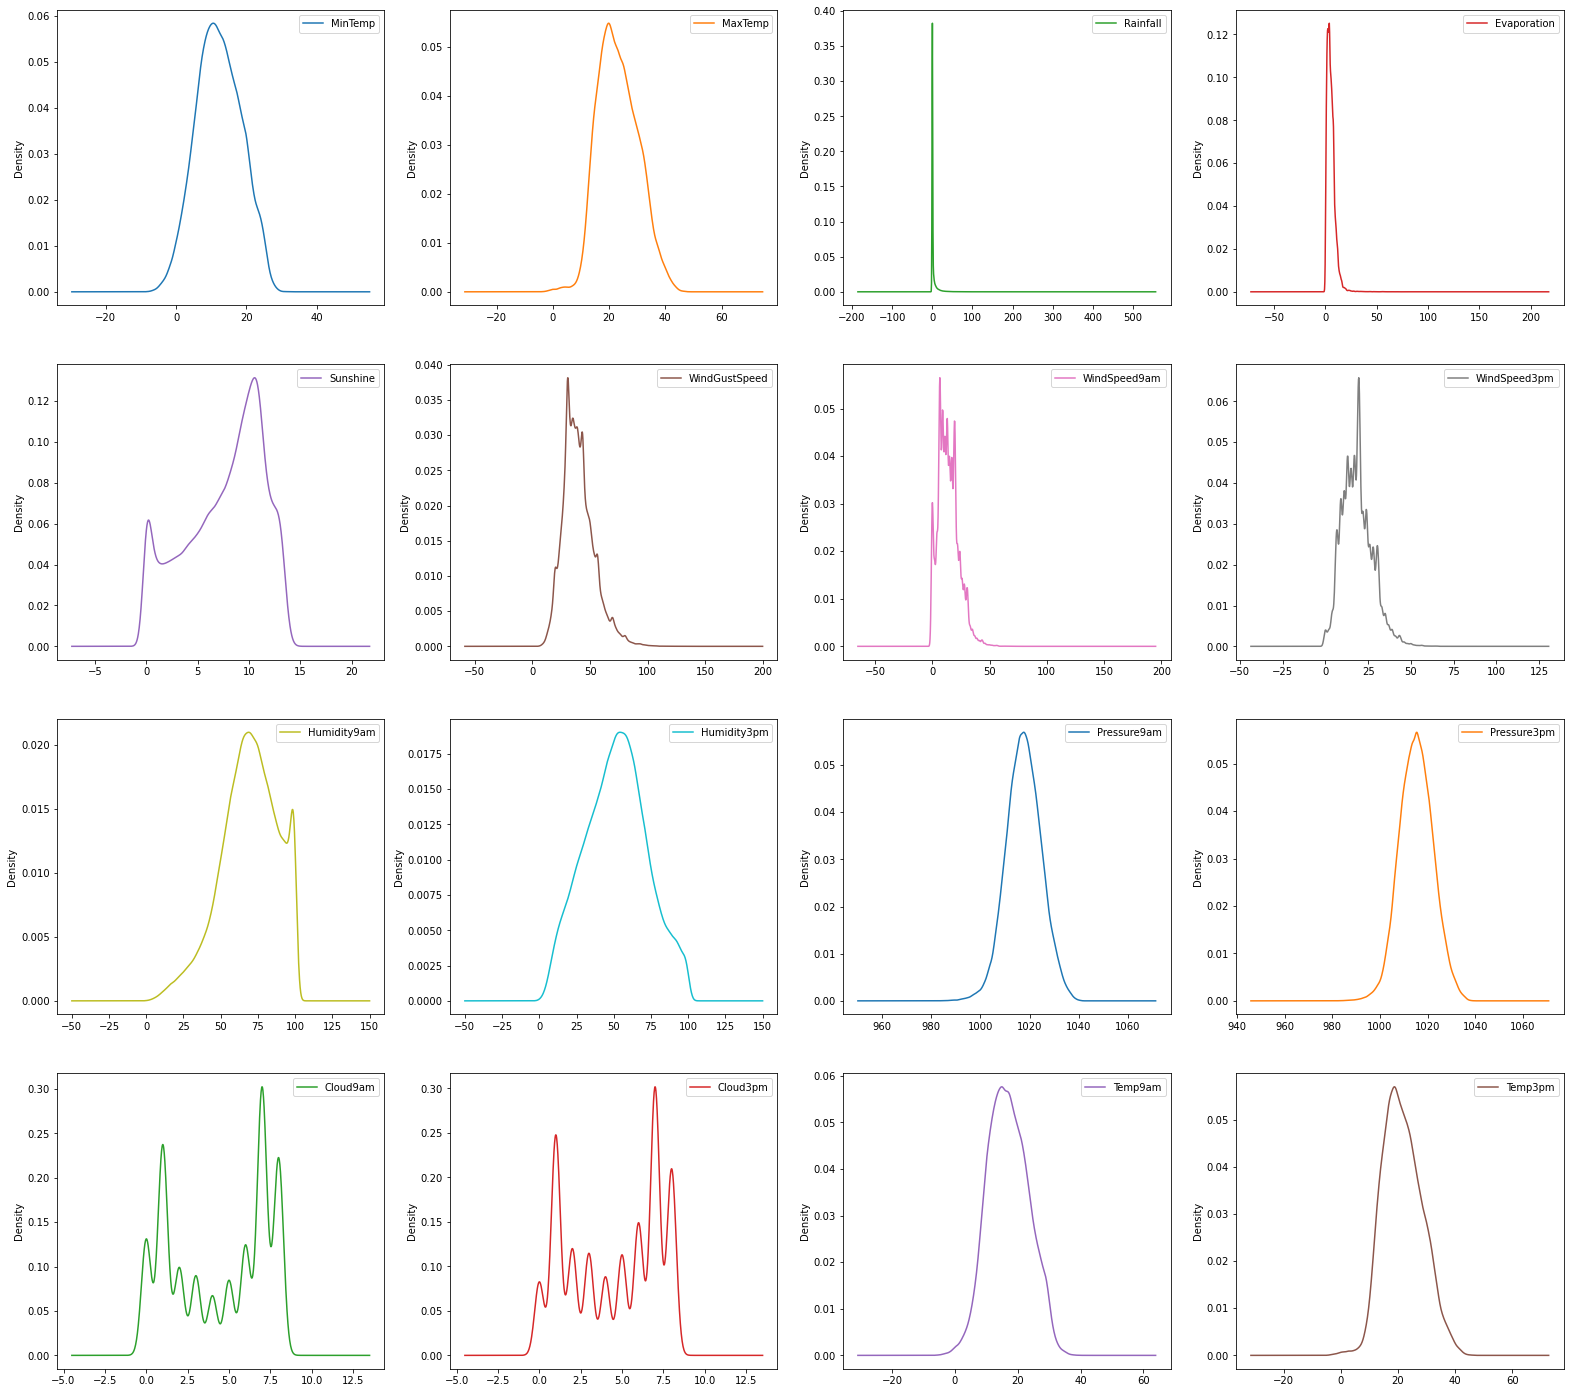

In [17]:
data.plot(kind="kde", subplots=True, layout=(4,4), figsize=(27,25),sharex=False, sharey=False);

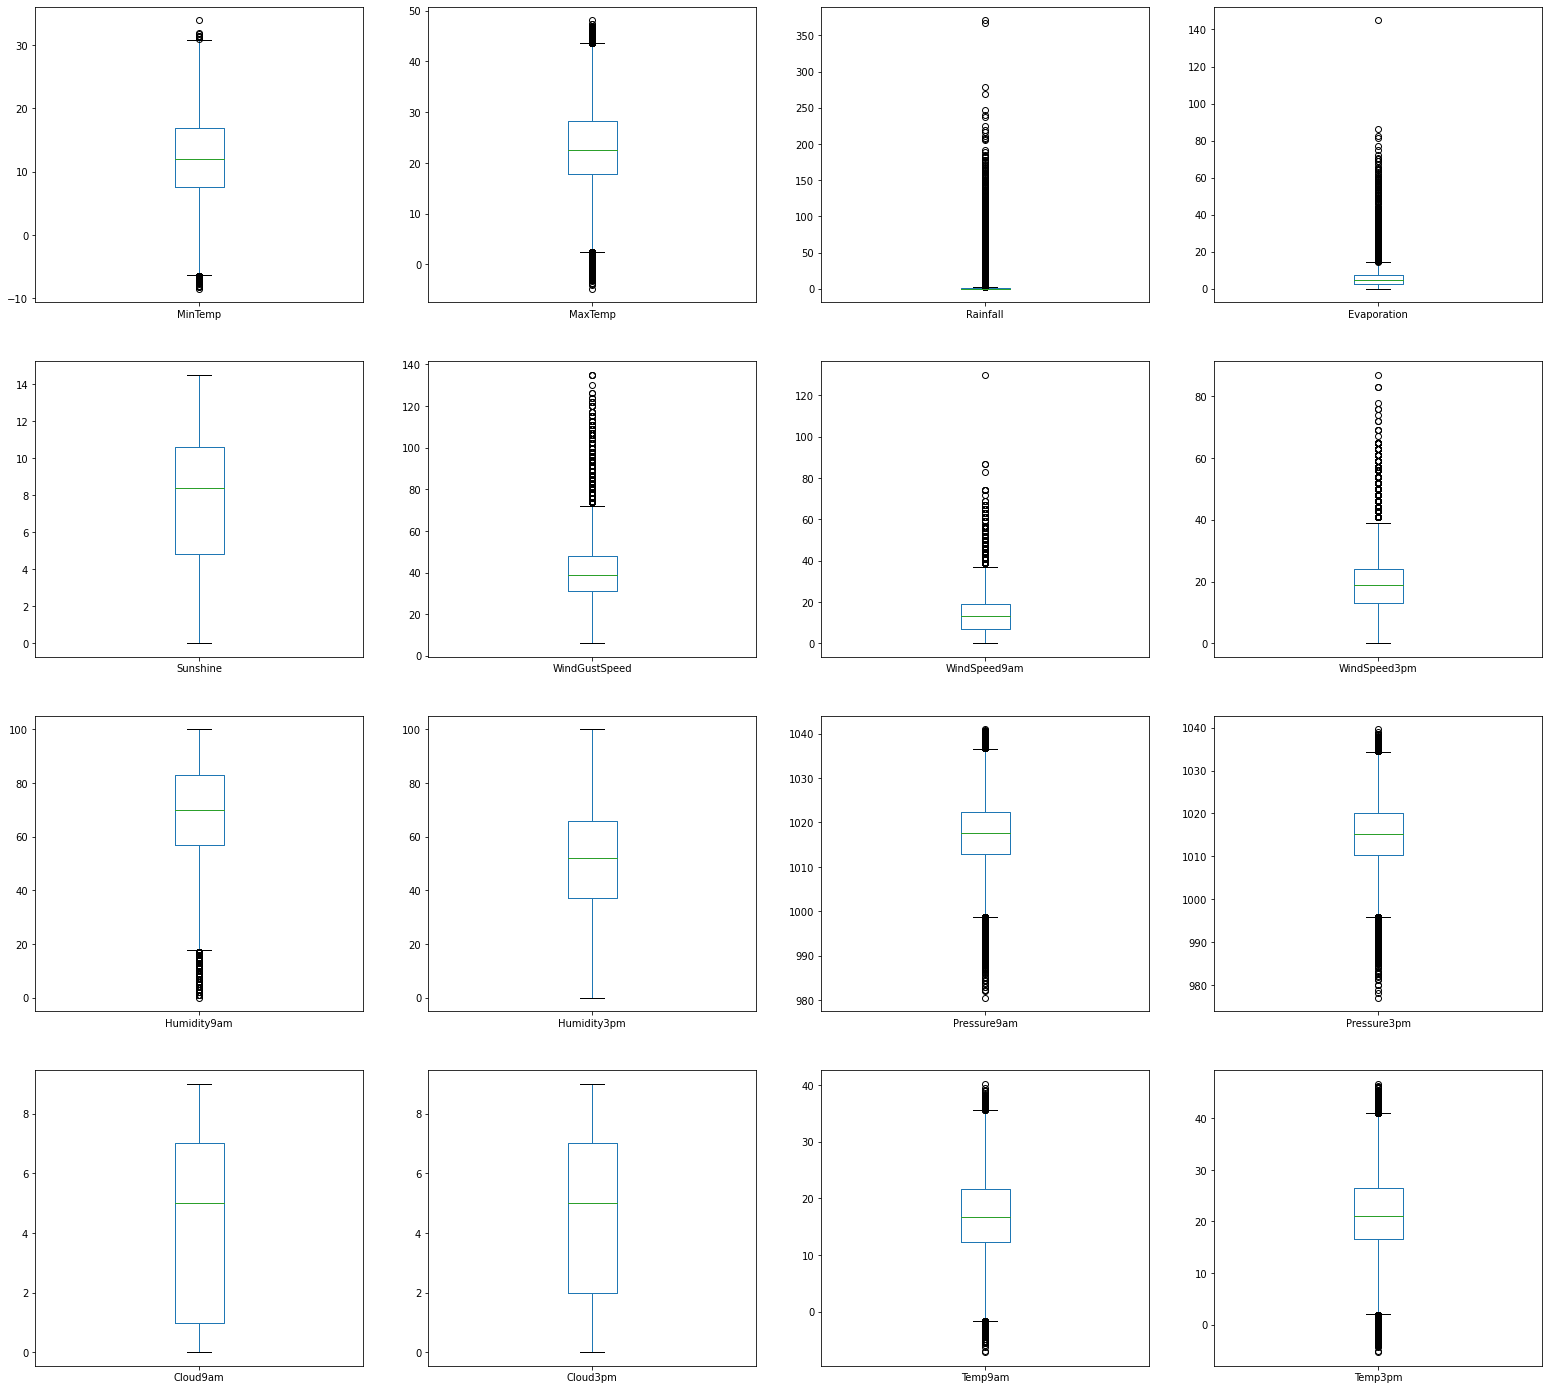

In [18]:
data.plot(kind="box", subplots=True, layout=(4,4), figsize=(27,25),sharex=False, sharey=False);

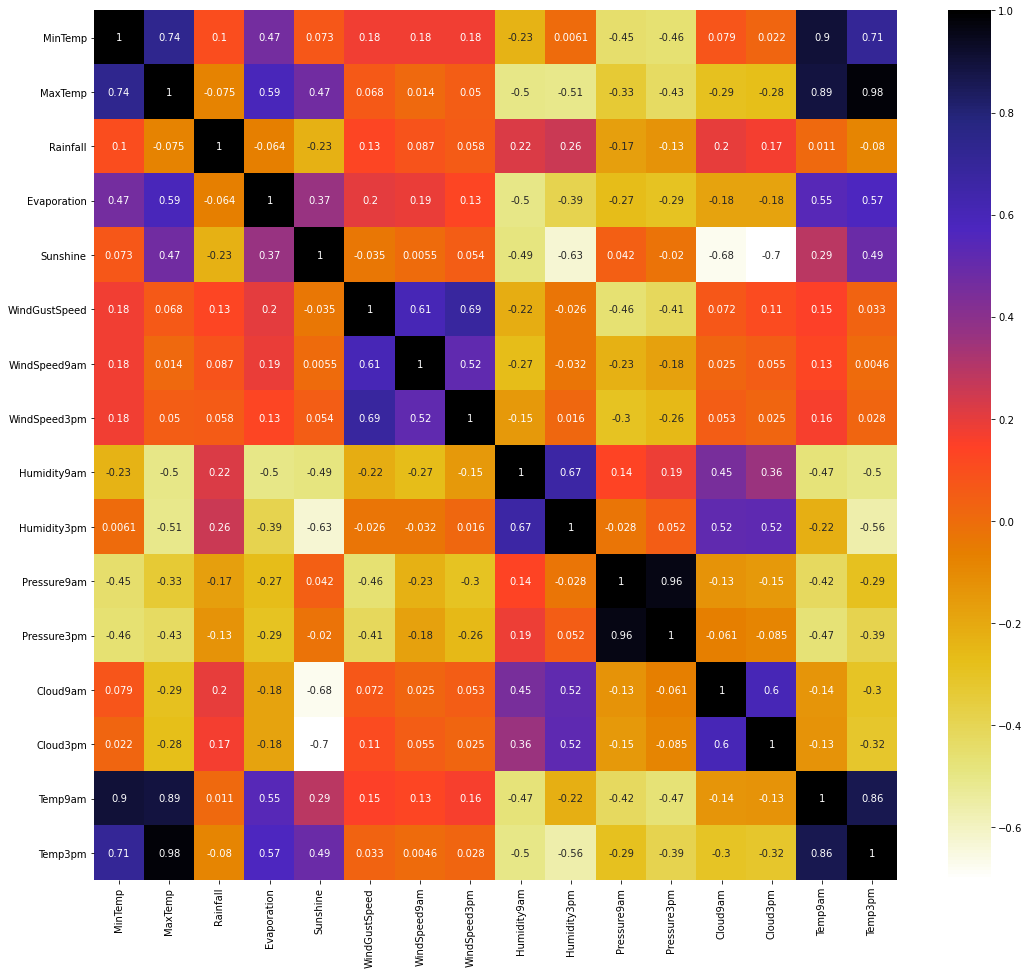

In [19]:
plt.figure(figsize=(18,16))
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.CMRmap_r);

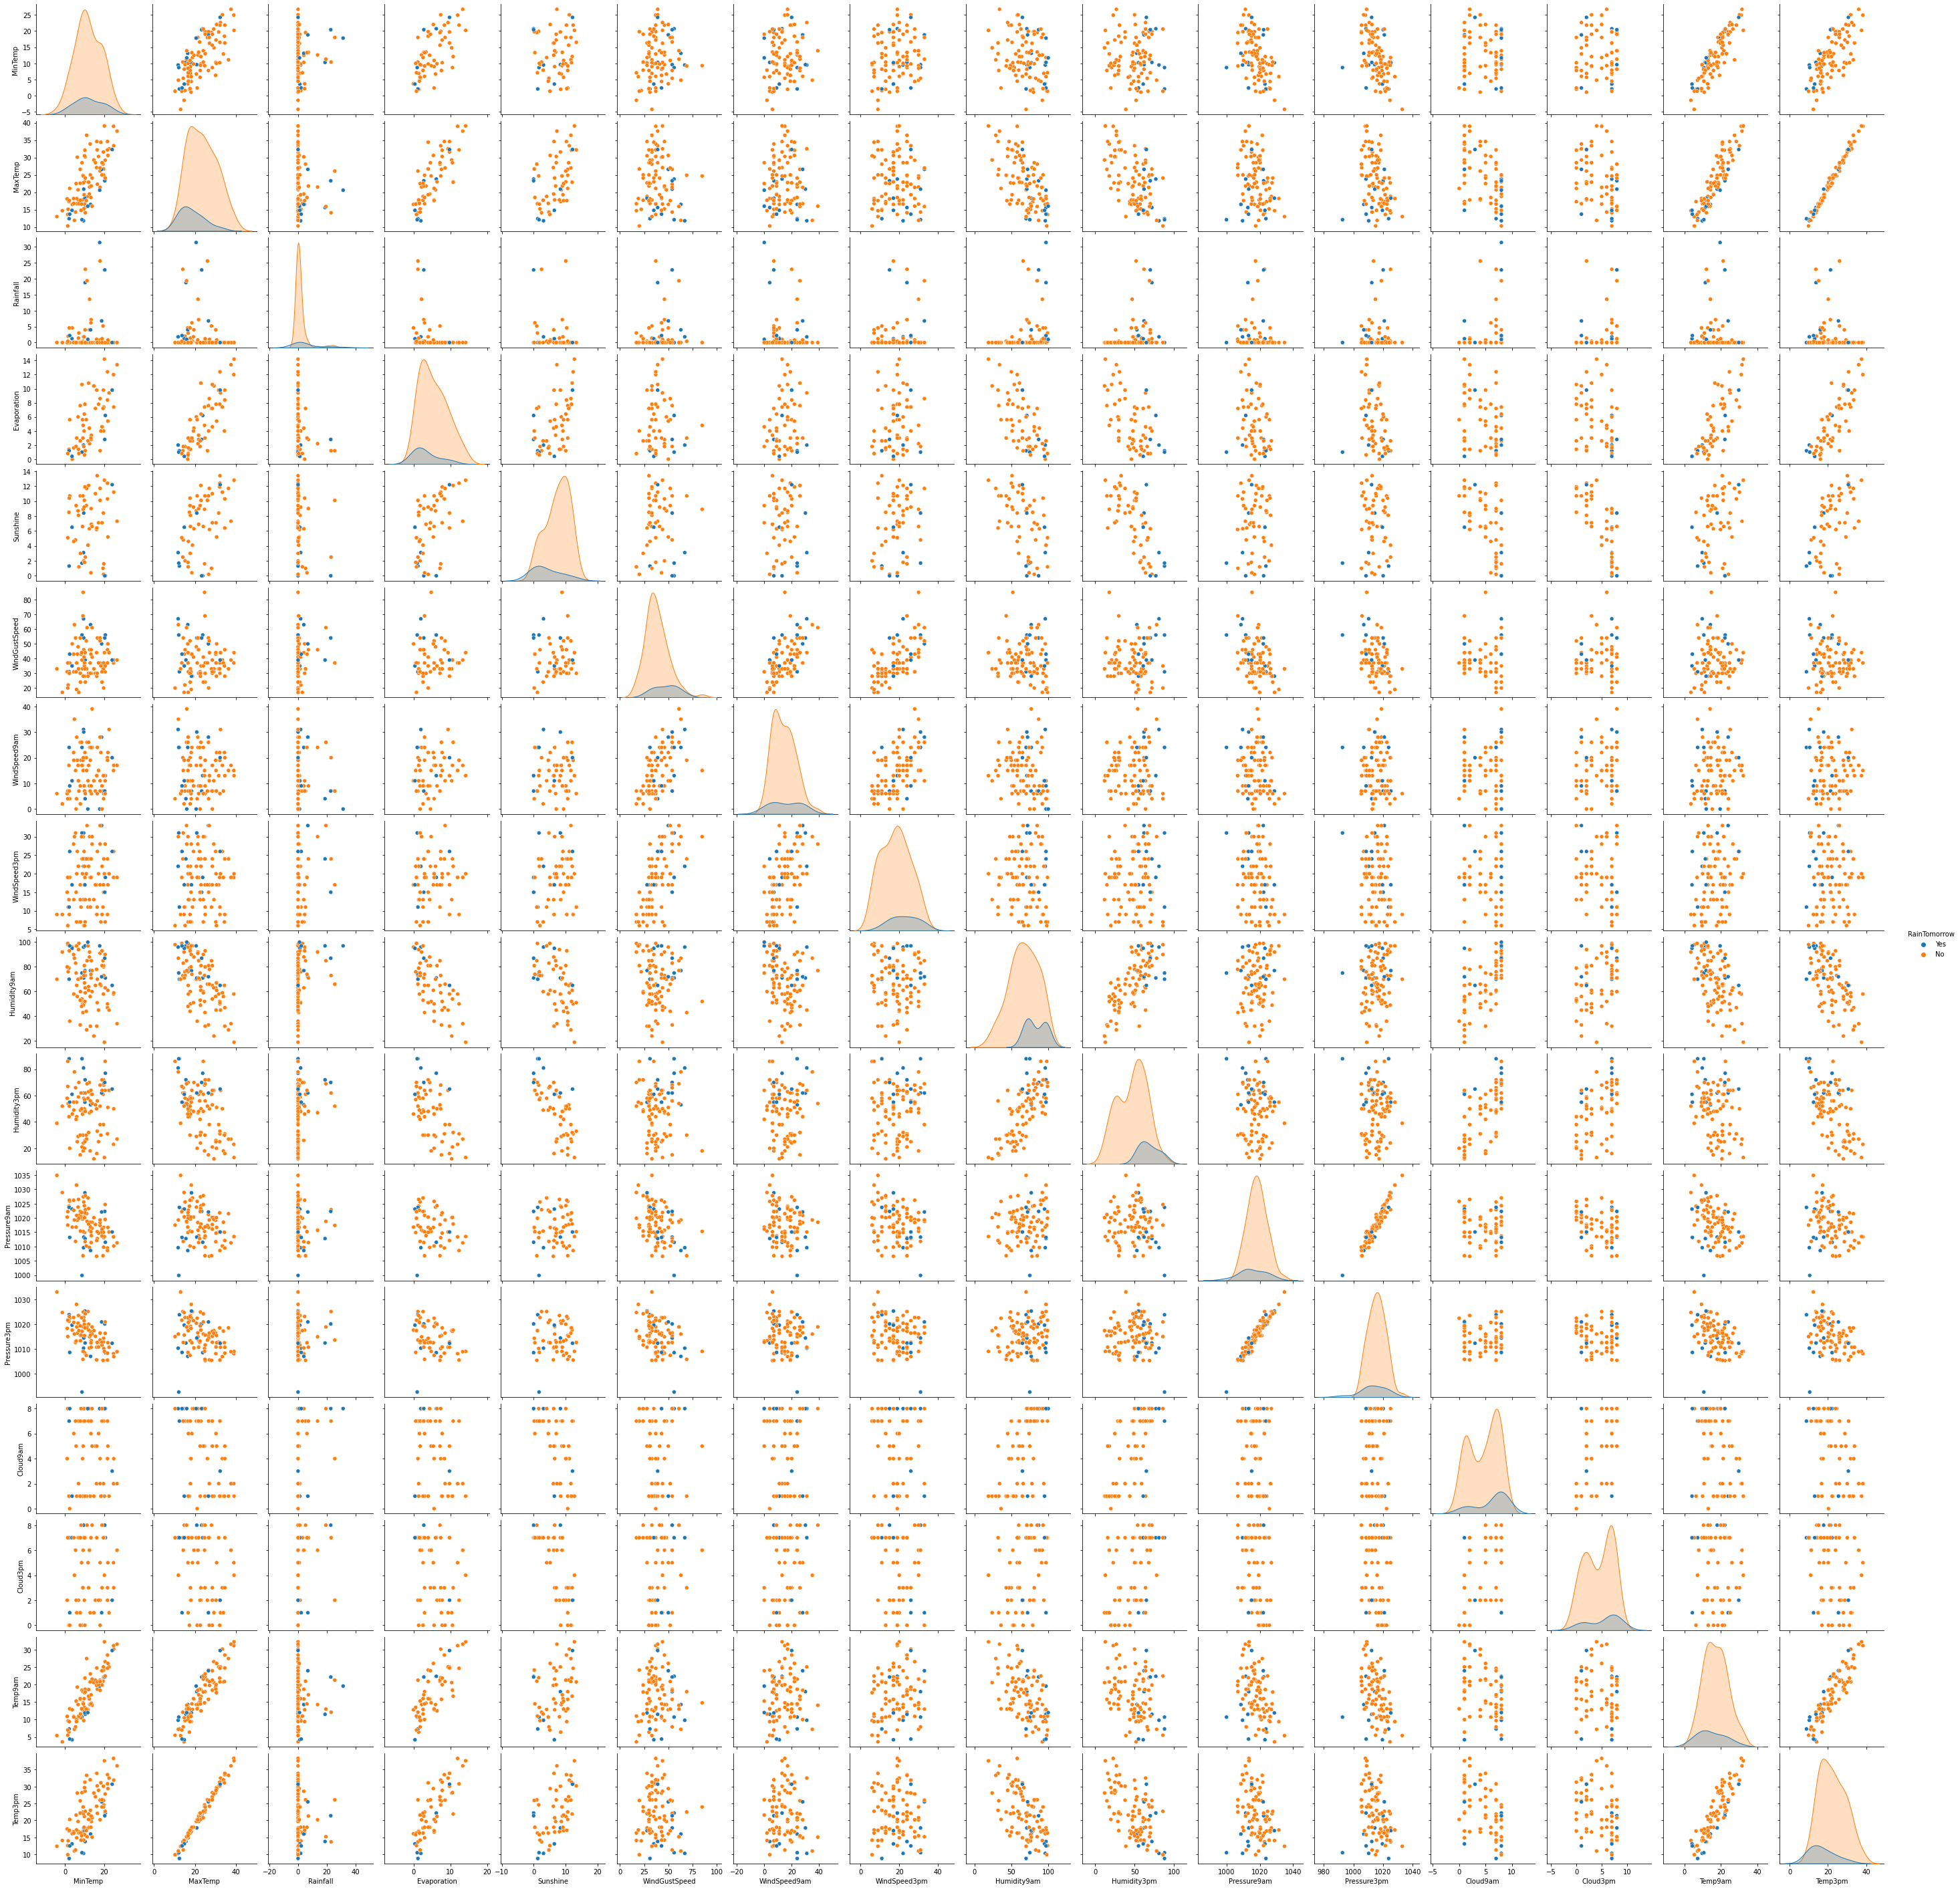

In [20]:
sns.pairplot(data.sample(n=100), hue="RainTomorrow");

<h1>IDENTIFYING STRUCTURE IN DATA</h1>

In [21]:
data_st = data.sample(n=5000)

In [22]:
data_st.drop(columns = ['Date'],inplace = True  )

In [23]:
data_st.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
118124,PerthAirport,6.7,23.0,0.0,3.6,9.5,E,52.0,NE,NE,22.0,17.0,53.0,28.0,1022.7,1017.3,3.0,0.0,13.9,22.4,No,No
30773,Sydney,13.8,24.7,0.0,5.8,8.5,NaN,NaN,WNW,NE,9.0,15.0,49.0,30.0,1014.8,1010.9,4.0,6.0,20.7,23.7,No,No
98277,Adelaide,16.1,33.5,0.0,8.0,12.7,SW,28.0,SSW,WSW,2.0,19.0,34.0,27.0,1012.6,1010.9,NaN,NaN,24.2,31.6,No,No
91916,GoldCoast,20.4,29.7,0.0,NaN,NaN,NNE,50.0,NNW,N,24.0,39.0,61.0,75.0,1018.0,1012.6,NaN,NaN,25.0,23.9,No,Yes
35923,SydneyAirport,13.7,23.3,0.0,5.4,11.4,E,39.0,NaN,E,0.0,28.0,52.0,35.0,1023.6,1021.9,5.0,1.0,18.5,22.6,No,No


In [24]:
# Select only numeric columns for the purpose
num_data = data_st.select_dtypes(include = ['float64', 'int64']).copy()
num_data.head()
num_data.shape      
num_data.columns

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
118124,6.7,23.0,0.0,3.6,9.5,52.0,22.0,17.0,53.0,28.0,1022.7,1017.3,3.0,0.0,13.9,22.4
30773,13.8,24.7,0.0,5.8,8.5,NaN,9.0,15.0,49.0,30.0,1014.8,1010.9,4.0,6.0,20.7,23.7
98277,16.1,33.5,0.0,8.0,12.7,28.0,2.0,19.0,34.0,27.0,1012.6,1010.9,NaN,NaN,24.2,31.6
91916,20.4,29.7,0.0,NaN,NaN,50.0,24.0,39.0,61.0,75.0,1018.0,1012.6,NaN,NaN,25.0,23.9
35923,13.7,23.3,0.0,5.4,11.4,39.0,0.0,28.0,52.0,35.0,1023.6,1021.9,5.0,1.0,18.5,22.6


(5000, 16)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [25]:
data_st.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [26]:
# Columns in num_data that are either discrete (with few levels) or numeric

cols=['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow']
num_cols=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm']
cat_cols=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

In [27]:
# Create an instance of StandardScaler object
ss= ss()

In [28]:
# Use fit and transform method
nc = ss.fit_transform(num_data.loc[:,num_cols])

In [29]:
nc.shape

(5000, 16)

In [30]:
# Transform numpy array back to pandas dataframe as we will be using pandas plotting functions

nc = pd.DataFrame(nc, columns = num_cols)
nc.head(2)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,-0.871028,-0.031159,-0.273711,-0.456302,0.501286,0.881653,0.900466,-0.186736,-0.841714,-1.151761,0.716182,0.300360,-0.515619,-1.640998,-0.475676,0.109769
1,0.229522,0.206231,-0.273711,0.047923,0.238258,NaN,-0.556017,-0.414080,-1.052459,-1.055538,-0.377764,-0.592879,-0.168675,0.557914,0.559127,0.296573


In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_cols:
    nc[i] = le.fit_transform(data_st[i])

In [32]:
data_st.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
118124,PerthAirport,6.7,23.0,0.0,3.6,9.5,E,52.0,NE,NE,22.0,17.0,53.0,28.0,1022.7,1017.3,3.0,0.0,13.9,22.4,No,No
30773,Sydney,13.8,24.7,0.0,5.8,8.5,NaN,NaN,WNW,NE,9.0,15.0,49.0,30.0,1014.8,1010.9,4.0,6.0,20.7,23.7,No,No
98277,Adelaide,16.1,33.5,0.0,8.0,12.7,SW,28.0,SSW,WSW,2.0,19.0,34.0,27.0,1012.6,1010.9,NaN,NaN,24.2,31.6,No,No
91916,GoldCoast,20.4,29.7,0.0,NaN,NaN,NNE,50.0,NNW,N,24.0,39.0,61.0,75.0,1018.0,1012.6,NaN,NaN,25.0,23.9,No,Yes
35923,SydneyAirport,13.7,23.3,0.0,5.4,11.4,E,39.0,NaN,E,0.0,28.0,52.0,35.0,1023.6,1021.9,5.0,1.0,18.5,22.6,No,No


In [33]:
nc.shape

(5000, 22)

In [34]:
# Also create a dataframe from random data for comparison:

rng = np.random.default_rng()
nc_rand = pd.DataFrame(rng.normal(size = (5000,22)),
                       columns = cols
                       )

In [35]:
# Add/overwrite these columns also

nc_rand['Location'] = np.random.randint(1,48,   size= (5000,))   # [0,1]
nc_rand['WindGustDir'] = np.random.randint(1,17, size= (5000,))   # [1,2,3]
nc_rand['WindDir9am'] = np.random.randint(1,17,  size= (5000,))   # [0 to 23]
nc_rand['WindDir3pm'] = np.random.randint(1,17,   size= (5000,))   # [0 to 6]
nc_rand['RainToday'] = np.random.randint(2,   size= (5000,))   # [0,1]
nc_rand['RainTomorrow'] = np.random.randint(2,   size= (5000,))   # [0,1]

nc_rand.shape

(5000, 22)

<h3>Parallel Coordinates Plot</h3>

<AxesSubplot:>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Location'),
  Text(1, 0, 'MinTemp'),
  Text(2, 0, 'MaxTemp'),
  Text(3, 0, 'Rainfall'),
  Text(4, 0, 'Evaporation'),
  Text(5, 0, 'Sunshine'),
  Text(6, 0, 'WindGustDir'),
  Text(7, 0, 'WindGustSpeed'),
  Text(8, 0, 'WindDir9am'),
  Text(9, 0, 'WindDir3pm'),
  Text(10, 0, 'WindSpeed9am'),
  Text(11, 0, 'WindSpeed3pm'),
  Text(12, 0, 'Humidity9am'),
  Text(13, 0, 'Humidity3pm'),
  Text(14, 0, 'Pressure9am'),
  Text(15, 0, 'Pressure3pm'),
  Text(16, 0, 'Cloud9am'),
  Text(17, 0, 'Cloud3pm'),
  Text(18, 0, 'Temp9am'),
  Text(19, 0, 'Temp3pm'),
  Text(20, 0, 'RainToday')])

Text(0.5, 1.0, 'Parallel chart with random data')

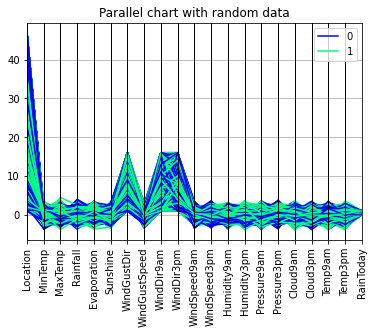

In [37]:
# Parallel coordinates with random data

fig1 = plt.figure()
pd.plotting.parallel_coordinates(nc_rand,
                                 'RainTomorrow',    # class_column
                                  colormap='winter'
                                  )
plt.xticks(rotation=90)
plt.title("Parallel chart with random data")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'MinTemp'),
  Text(1, 0, 'MaxTemp'),
  Text(2, 0, 'Rainfall'),
  Text(3, 0, 'Evaporation'),
  Text(4, 0, 'Sunshine'),
  Text(5, 0, 'WindGustSpeed'),
  Text(6, 0, 'WindSpeed9am'),
  Text(7, 0, 'WindSpeed3pm'),
  Text(8, 0, 'Humidity9am'),
  Text(9, 0, 'Humidity3pm'),
  Text(10, 0, 'Pressure9am'),
  Text(11, 0, 'Pressure3pm'),
  Text(12, 0, 'Cloud9am'),
  Text(13, 0, 'Cloud3pm'),
  Text(14, 0, 'Temp9am'),
  Text(15, 0, 'Temp3pm'),
  Text(16, 0, 'Location'),
  Text(17, 0, 'WindGustDir'),
  Text(18, 0, 'WindDir9am'),
  Text(19, 0, 'WindDir3pm'),
  Text(20, 0, 'RainToday')])

Text(0.5, 1.0, 'Parallel chart with ad data')

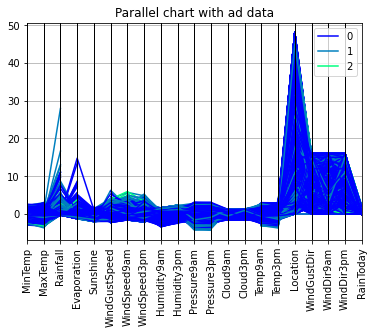

In [38]:
# Parallel coordinates with 'Rain Prediction' data
fig2 = plt.figure()
ax = pd.plotting.parallel_coordinates(nc,
                                 'RainTomorrow',
                                  colormap= plt.cm.winter
                                  )

plt.xticks(rotation=90)
plt.title("Parallel chart with ad data")

<h3>Andrews Plot</h3>

<AxesSubplot:>

Text(0.5, 1.0, 'Andrews plots with random data')

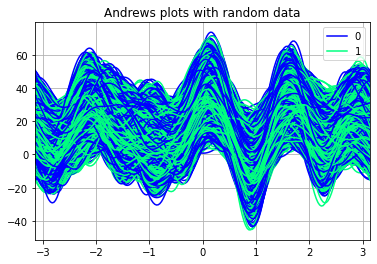

In [40]:
# Andrews charts with random data
fig3 = plt.figure()
pd.plotting.andrews_curves(nc_rand,
                           'RainTomorrow',
                           colormap = 'winter')

plt.title("Andrews plots with random data")

<AxesSubplot:>

(array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 1.0, 'Andrews curve with ad data')

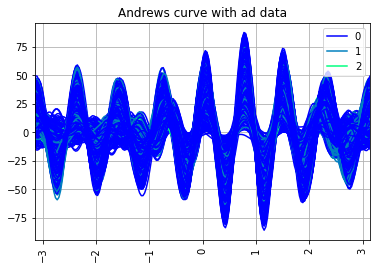

In [41]:
# Andrews plots with Rain Prediction data
fig4 = plt.figure()
pd.plotting.andrews_curves(nc,
                           'RainTomorrow',
                            colormap = plt.cm.winter
                           )
plt.xticks(rotation=90)
plt.title("Andrews curve with ad data")

<h1>FEATURE PREPARATION</h1>

In [42]:
data['Year'] = pd.DatetimeIndex(data['Date']).year
data['Month'] = pd.DatetimeIndex(data['Date']).month

In [43]:
# We do not need Date column
data.drop(columns = ['Date'],inplace = True  )

In [44]:
df_preprocessed = data.copy() # Creating another dataframe

In [45]:
df_preprocessed.isnull().mean() * 100

Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
Year              0.000000
Month             0.000000
dtype: float64

In [46]:
mean = df_preprocessed.mean()
df_preprocessed.fillna(mean, inplace=True)

df_preprocessed.isna().sum()

Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
Year                 0
Month                0
dtype: int64

In [47]:
df_preprocessed.replace(np.nan, 'NaN', inplace=True)
df_preprocessed.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
dtype: int64

In [48]:
df_preprocessed.head()


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
0,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No,2008,12
1,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No,2008,12
2,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No,2008,12
3,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No,2008,12
4,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No,2008,12


In [49]:
df_preprocessed.shape

(145460, 24)

In [50]:
df_preprocessed = df_preprocessed[df_preprocessed.RainToday != 'NaN']

In [51]:
df_preprocessed.shape

(142199, 24)

In [52]:
df_preprocessed = df_preprocessed[df_preprocessed.RainTomorrow != 'NaN']

In [53]:
df_preprocessed.shape

(140787, 24)

In [54]:
# Divide data into predictors and target
#     First 30 columns are predictors

#X = df_preprocessed.iloc[ :, 0:21]
#X.head(2)

# 3.3.1 30th index or 31st column is target
print("\n\nTarget,y, values")
y = df_preprocessed.iloc[ : , 21:22]
#y.head()


X = df_preprocessed.drop(["RainTomorrow"],axis=1)
#y = df_preprocessed.RainTomorrow



Target,y, values


In [55]:
X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month
0,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,2008,12
1,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,2008,12
2,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,2008,12
3,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,2008,12
4,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,2008,12


In [56]:
y.shape

(140787, 1)

In [57]:
X.Month.value_counts()

5     12931
3     12885
1     12797
6     12258
10    11710
7     11660
8     11648
11    11352
9     11222
4     11210
12    10703
2     10411
Name: Month, dtype: int64

In [58]:
df_preprocessed.columns    # Displays the columns of preprocessed dataframe

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month'],
      dtype='object')

In [59]:
# Dividing the columns into numerical and categorical 
num_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']
cat_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'Year', 'Month']

In [60]:
# Applying the labelencoder to convert the categorical columns into numerical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[cat_cols] = X[cat_cols].apply(le.fit_transform)

In [61]:
X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month
0,2,13.4,22.9,0.6,5.468232,7.611178,14,44.0,14,15,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,1,11
1,2,7.4,25.1,0.0,5.468232,7.611178,15,44.0,6,16,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,1,11
2,2,12.9,25.7,0.0,5.468232,7.611178,16,46.0,14,16,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,1,11
3,2,9.2,28.0,0.0,5.468232,7.611178,4,24.0,10,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,1,11
4,2,17.5,32.3,1.0,5.468232,7.611178,14,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,1,11


In [62]:
y.head()

,RainTomorrow
0,No
1,No
2,No
3,No
4,No


In [63]:
y.value_counts()

RainTomorrow
No              109586
Yes              31201
dtype: int64

In [64]:
y.head()

,RainTomorrow
0,No
1,No
2,No
3,No
4,No


In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = y.apply(le.fit_transform)

In [66]:
# Can we change datatype to float32 ?
#       Check.
X.min().min()           
X.max().max()          

# Save memory
X = X.astype('float32')


-8.5

1041.0

In [67]:
# Store column names somewhere
#     for use in feature importance

colnames = X.columns.tolist()

In [68]:

# Split dataset into train and validation parts
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.35,
                                                    shuffle = True,
                                                    stratify = y
                                                    )

# 
X_train.shape        # (91511, 23)
X_test.shape         # (49276, 23)
y_train.shape        # (91511, 1)
y_test.shape         # (49276, 1)

(91511, 23)

(49276, 23)

(91511, 1)

(49276, 1)

In [69]:
y_test.head()

,RainTomorrow
118460,0
122276,0
57661,0
85746,0
127787,1


In [72]:
################# CC. Create pipeline #################
#### Pipe using XGBoost


# Pipeline steps
# steps: List of (name, transform) tuples
#       (implementing fit/transform) that are
#       chained, in the order in which they
#       are chained, with the last object an
#       estimator.
#      Format: [(name, transformer), (name, transformer)..(name, estimator)]

steps_xg = [('sts', ss ),
            ('pca', PCA()),
            ('xg',  XGBClassifier(silent = False,
                                  n_jobs=3)       
            )
            ]

# Instantiate Pipeline object

pipe_xg = Pipeline(steps_xg)

# Another way to create pipeline:
#     Not used below

#pipe_xg1 = make_pipeline (
#                          ss(),
#                          PCA(),
#                          XGBClassifier(silent = False,
#                                        n_jobs=2)
#                          )



In [73]:
##################### DD. Grid Search #################

#  Specify xgboost parameter-range
#  Dictionary of parameters (16 combinations)
#     Syntax: {
#              'transformerName__parameterName' : [ <listOfValues> ]
#              }
#
# What parameters in the pipe are available for tuning

print("\n\n--Which parameters can be tuned?--\n\n")
pipe_xg.get_params()



--Which parameters can be tuned?--




{'memory': None,
 'steps': [('sts', StandardScaler()),
  ('pca', PCA()),
  ('xg',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_bytree=None, early_stopping_rounds=None,
                 enable_categorical=False, eval_metric=None, gamma=None,
                 gpu_id=None, grow_policy=None, importance_type=None,
                 interaction_constraints=None, learning_rate=None, max_bin=None,
                 max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                 max_leaves=None, min_child_weight=None, missing=nan,
                 monotone_constraints=None, n_estimators=100, n_jobs=3,
                 num_parallel_tree=None, predictor=None, random_state=None,
                 reg_alpha=None, reg_lambda=None, ...))],
 'verbose': False,
 'sts': StandardScaler(),
 'pca': PCA(),
 'xg': XGBClassifier(base_score=None, booster=None, callbacks=None,
               c

In [74]:
# Define dictionary
parameters = {'xg__learning_rate':  [0.03, 0.05], # learning rate decides what percentage
                                                  #  of error is to be fitted by
                                                  #   by next boosted tree.
                                                  # See this answer in stackoverflow:
                                                  # https://stats.stackexchange.com/questions/354484/why-does-xgboost-have-a-learning-rate
                                                  # Coefficients of boosted trees decide,
                                                  #  in the overall model or scheme, how much importance
                                                  #   each boosted tree shall have. Values of these
                                                  #    Coefficients are calculated by modeling
                                                  #     algorithm and unlike learning rate are
                                                  #      not hyperparameters. These Coefficients
                                                  #       get adjusted by l1 and l2 parameters
              'xg__n_estimators':   [200,  300],  # Number of boosted trees to fit
                                                  # l1 and l2 specifications will change
                                                  # the values of coeff of boosted trees
                                                  # but not their numbers

              'xg__max_depth':      [4,6],
              'pca__n_components' : [15,23],
              'xg__booster': ['gbtree','gblinear']
              }                               # Total: 2 * 2 * 2 * 2



In [75]:
# Define revised dictionary
#       This takes 3.5 minutes
parameters = {'xg__learning_rate':  [0.03, 0.05], # learning rate decides what percentage
                                                  #  of error is to be fitted by
                                                  #   by next boosted tree.
                                                  # See this answer in stackoverflow:
                                                  # https://stats.stackexchange.com/questions/354484/why-does-xgboost-have-a-learning-rate
                                                  # Coefficients of boosted trees decide,
                                                  #  in the overall model or scheme, how much importance
                                                  #   each boosted tree shall have. Values of these
                                                  #    Coefficients are calculated by modeling
                                                  #     algorithm and unlike learning rate are
                                                  #      not hyperparameters. These Coefficients
                                                  #       get adjusted by l1 and l2 parameters
               'xg__max_depth':      [4,6],
 
              'pca__n_components' : [15,23],
               }                               # Total: 2 * 2 * 2 * 2



In [76]:
# Grid Search (16 * 2) iterations
#    Create Grid Search object first with all necessary
#    specifications. Note that data, X, as yet is not specified

#    Data Leakage and pipelining:
#    Pipeline avoids data leakage during GridSearch
#    See this: https://towardsdatascience.com/a-simple-example-of-pipeline-in-machine-learning-with-scikit-learn-e726ffbb6976

clf = GridSearchCV(pipe_xg,            # pipeline object
                   parameters,         # possible parameters
                   n_jobs = 2,         # USe parallel cpu threads
                   cv =2 ,             # No of folds
                   verbose =1,         # Higher the value, more the verbosity
                   scoring = ['accuracy', 'roc_auc'],  # Metrics for performance
                   refit = 'roc_auc'   # Refitting final model on what parameters?
                                       # Those which maximise auc
                   )



In [77]:
## Delete objects not needed
#      We need X_train, y_train, X_test, y_test
del X
del data
del y
gc.collect()

222

In [78]:
# Start fitting pipeline to data
print("\n\n--Takes time...---\n")
start = time.time()
clf.fit(X_train, y_train)
end = time.time()
print()
(end - start)/60               # 4 minutes



--Takes time...---

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[00:54:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('sts', StandardScaler()),
                                       ('pca', PCA()),
                                       ('xg',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_p

1.6138272722562155

In [79]:

f"Best score: {clf.best_score_} "            # 'Best score: 0.8738072157153556 '


print()
f"Best parameter set {clf.best_params_}"

'Best score: 0.8722691810882012 '

"Best parameter set {'pca__n_components': 23, 'xg__learning_rate': 0.05, 'xg__max_depth': 6}"

--Few predictions--



array([0, 0, 0, 0])



--Accuracy Score--



85.02313499472359



--Confusion Matrix--



array([[36440,  1916],
       [ 5464,  5456]], dtype=int64)



--F1 Score pos-label: 1--



0.5965449376776732



--F1 Score pos-label: 0--



0.9080488412658859



--ROC curve--



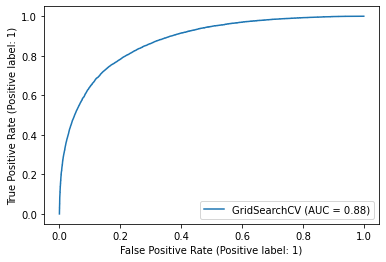

In [80]:
# Make predictions using the best returned model
y_pred = clf.predict(X_test)
print("--Few predictions--\n")
y_pred[:4]

# Accuracy score
print("\n\n--Accuracy Score--\n")
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100.0             

# Confusion matrix
print("\n\n--Confusion Matrix--\n")
confusion_matrix( y_test,y_pred)

# F1 score
print("\n\n--F1 Score pos-label: 1--\n")
f1_score(y_test,y_pred, pos_label = 1)      

print("\n\n--F1 Score pos-label: 0--\n")
f1_score(y_test,y_pred, pos_label = 0)      

# ROC curve and get AUC
print("\n\n--ROC curve--\n")
_=plot_roc_curve(clf, X_test, y_test)

In [81]:
# Get feature importances from GridSearchCV best fitted 'xg' model

print("\n\n--How many features--\n")
clf.best_estimator_.named_steps["xg"].feature_importances_.shape

print("\n\n---Feature importances---\n")
clf.best_estimator_.named_steps["xg"].feature_importances_



--How many features--



(23,)



---Feature importances---



array([0.07166357, 0.38691577, 0.05211761, 0.02548978, 0.02817227,
       0.02228644, 0.01754165, 0.0157603 , 0.01156084, 0.02531355,
       0.01682347, 0.02979359, 0.03203947, 0.04018825, 0.01554665,
       0.01255359, 0.01198437, 0.01753167, 0.0456382 , 0.05783954,
       0.0187449 , 0.03057706, 0.01391746], dtype=float32)

In [82]:
# Create a dataframe of feature importances with names of columns and sorted by feature-imp

imp_values = clf.best_estimator_.named_steps["xg"].feature_importances_

df_imp = pd.DataFrame(
                      data = imp_values,
                      index = colnames,
                      columns = ["imp"]
                      ).sort_values(by = 'imp')

df_imp

,imp
WindDir9am,0.011561
Cloud9am,0.011984
Pressure3pm,0.012554
Month,0.013917
Pressure9am,0.015547
WindGustSpeed,0.015760
WindSpeed9am,0.016823
Cloud3pm,0.017532
WindGustDir,0.017542
RainToday,0.018745


In [83]:
# First five columns with least feature importance are:

list(df_imp.index.values[:5])

['WindDir9am', 'Cloud9am', 'Pressure3pm', 'Month', 'Pressure9am']

In [84]:
# Let us drop these from X_train and X_test
Xtrain = X_train.drop(columns = list(df_imp.index.values[:5]))
Xtest = X_test.drop(columns = list(df_imp.index.values[:5]))

# Build model again with reduced dataset
clf_dr = GridSearchCV(pipe_xg,            # pipeline object
                      parameters,         # possible parameters
                      n_jobs = 2,         # USe parallel cpu threads
                      cv =3 ,             # No of folds
                      verbose =2,         # Higher the value, more the verbosity
                      scoring = ['accuracy', 'roc_auc'],  # Metrics for performance
                      refit = 'roc_auc'   # Refitting final model on what parameters?
                                       # Those which maximise auc
                     )


start = time.time()
clf_dr.fit(Xtrain, y_train)
end = time.time()
(end - start)/60               # 25 minutes

# Make predictions
y_pred_dr = clf_dr.predict(Xtest)

# Compare results.
f1_score(y_test,y_pred_dr, pos_label = 1)      
f1_score(y_test,y_pred_dr, pos_label = 0)      
f1_score(y_test,y_pred, pos_label = 1)      
f1_score(y_test,y_pred, pos_label = 0)    

Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.83485045 0.84090437 0.84058746 0.84431378        nan        nan
        nan        nan]
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.84730824 0.8550146  0.8547906  0.86010406        nan        nan
        nan        nan]
  warnings.warn(


[00:55:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('sts', StandardScaler()),
                                       ('pca', PCA()),
                                       ('xg',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_p

1.188987680276235

0.5781534891430467

0.9050998719749419

0.5965449376776732

0.9080488412658859

<h1>RANDOMIZED SEARCH</h1>

In [85]:
# Tune parameters using randomized search
# Hyperparameters to tune and their ranges
parameters = {'xg__learning_rate':  uniform(0, 1),
              'xg__n_estimators':   range(50,300),
              'xg__max_depth':      range(3,10),
              'pca__n_components' : range(2,11)}

In [86]:
# Tune parameters using random search
# Create the object first

rs = RandomizedSearchCV(
                          pipe_xg,
                          param_distributions=parameters,
                          scoring= ['roc_auc', 'accuracy'],
                          n_iter=4,           
                                              
                          verbose = 1,
                          refit = 'roc_auc',
                          n_jobs = 2,          
                          cv = 2               
                        )


In [87]:
# Run random search for 25 iterations

start = time.time()
rs.fit(X_train, y_train)
end = time.time()
print()
(end - start)/60  

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[00:56:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('sts', StandardScaler()),
                                             ('pca', PCA()),
                                             ('xg',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric=None,
                                                            g

0.8178065061569214

In [88]:
# Evaluate
f"Best score: {rs.best_score_} " ;print()           
f"Best parameter set: {rs.best_params_} " ; print()


# Make predictions from the best returned model
y_pred = rs.predict(X_test)


# Accuracy and f1_score
accuracy = accuracy_score(y_test, y_pred)
f"Accuracy: {accuracy * 100.0}"   ; print()     
f"f1 score: {f1_score(y_test,y_pred, pos_label = 1)}" ; print()     


'Best score: 0.8273795087222022 '

"Best parameter set: {'pca__n_components': 10, 'xg__learning_rate': 0.7942408511578406, 'xg__max_depth': 4, 'xg__n_estimators': 188} "

'Accuracy: 82.39305138404092'

'f1 score: 0.546661093113178'